# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
data = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz"
df = pd.read_csv(data, sep="\t")
df_sample = df.sample(n=10)
print(df_sample)

     sepal-length  sepal-width  petal-length  petal-width  target
94            7.7          2.6           6.9          2.3       2
110           5.7          2.8           4.5          1.3       1
97            5.8          2.7           3.9          1.2       1
23            6.2          2.9           4.3          1.3       1
119           4.9          3.0           1.4          0.2       0
103           5.4          3.7           1.5          0.2       0
17            6.3          2.8           5.1          1.5       2
147           5.1          3.4           1.5          0.2       0
61            7.3          2.9           6.3          1.8       2
30            6.7          3.1           5.6          2.4       2


### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [35]:
for col in df_sample.columns:
    print(col)

sepal-length
sepal-width
petal-length
petal-width
target


### Column Definitions
- sepal-length:  length of the flower's sepal in centimeters
- sepal-width: width of the flower's sepal in centimeters
- petal-length: length of the flower's petals in centimeters
- petal-width: width of the flower's petal in centimeters
- target: species of the iris plant (Setosa, Versicolour, or Virginica)

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

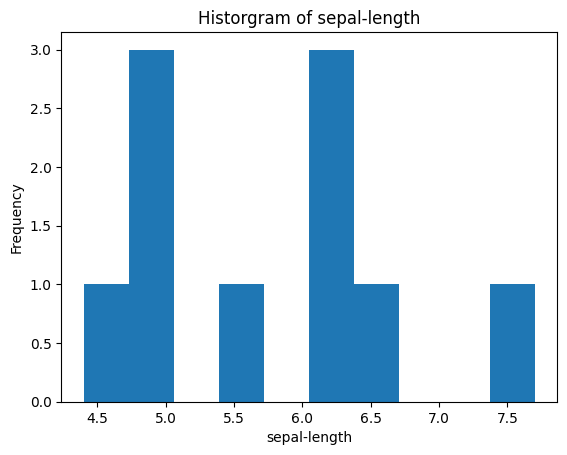

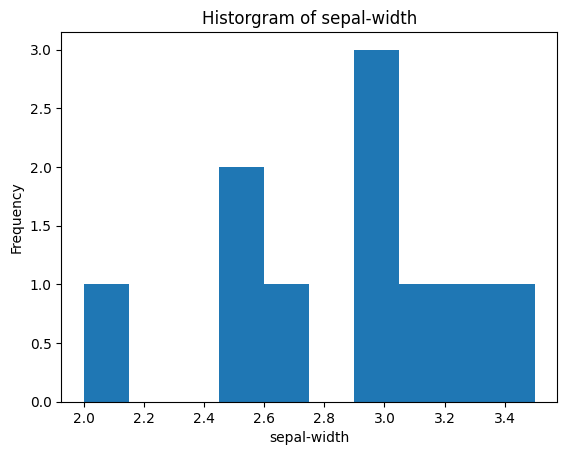

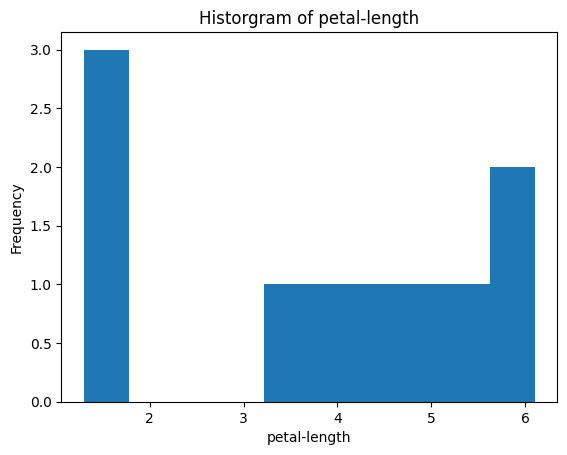

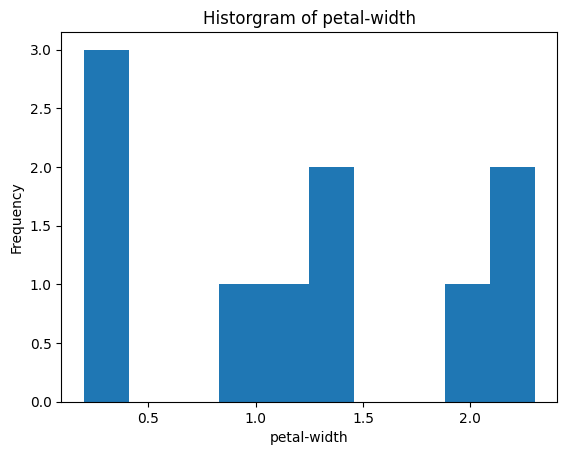

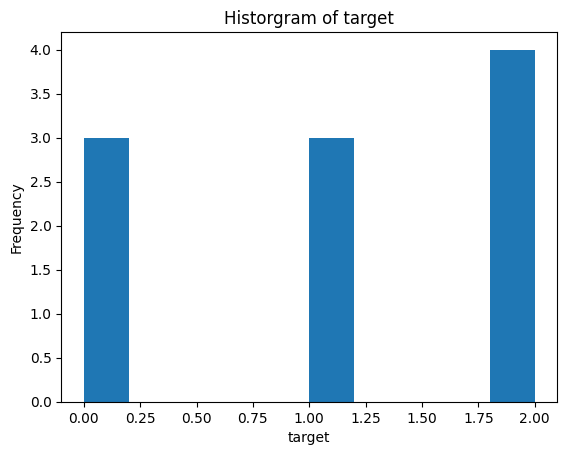

In [37]:
for col in df_sample.columns:
    plt.figure()
    plt.hist(df_sample[col])
    plt.title(f"Historgram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Column Distribution Matching Types
- sepal-length: bimodal
- sepal-width: uniform
- petal-length: bimodal
- petal-width: bimodal
- target: multinomal 

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

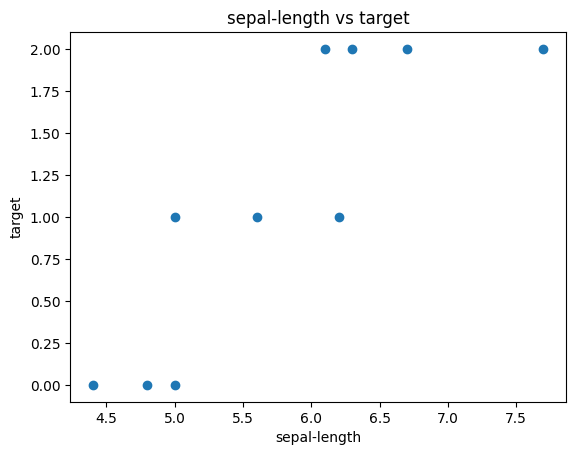

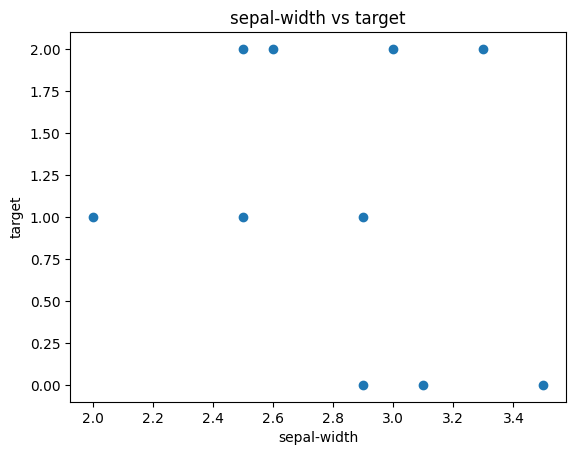

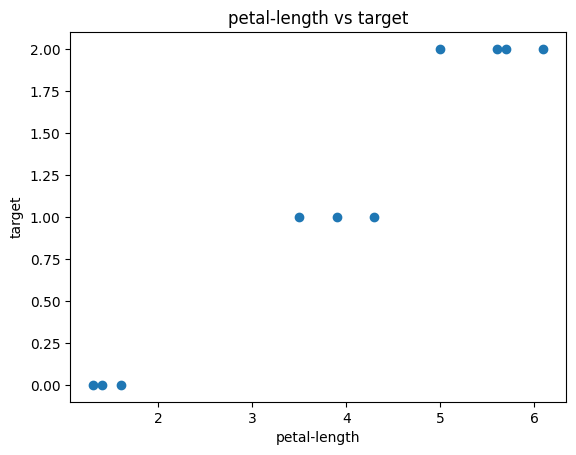

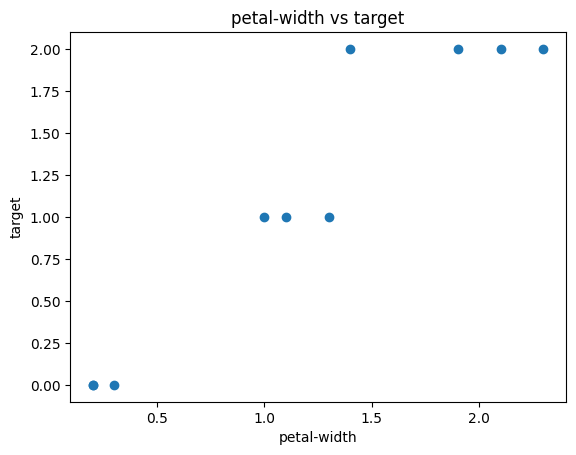

In [38]:
input_cols = [col for col in df_sample.columns if col != 'target']

for col in input_cols:
    plt.figure()
    plt.scatter(df_sample[col], df_sample['target'])
    plt.xlabel(col)
    plt.ylabel("target")
    plt.title(f"{col} vs target")
    plt.show()

### Relationship Between Input Features and Target
- Sepal length is partially dependent on the target. Target 0 can be clearly identified by its smaller sepal length. However, targets 1 and 2 overlap and cannot be distinguished from each other based on sepal length alone.
- Sepal width is independent of the target. All three targets appear across nearly the same sepal-width range, and there is no visible separation or clustering. Because the targets heavily overlap, sepal width does not help distinguish between them.
- Petal length is strongly dependent on the target. Each target occupies a different range of petal lengths with no overlap: target 0 has very small values, target 1 has medium values, and target 2 has the largest values. Because the targets are completely separated, petal length is a highly informative predictor of the target.
- Petal width is strongly dependent on the target. Each target occupies a different range of petal widths: target 0 appears only at very small values, target 1 forms a tight mid-range cluster, and target 2 occurs only at the largest values. Because the targets are almost completely separated, petal width is a very informative predictor of the target.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [8]:
x = df.drop(columns='target')
y = df['target']

model = sklearn.linear_model.LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

In [9]:
mse_full = np.mean((y - y_pred) ** 2)
print("Mean Squared Error:", mse_full)

Mean Squared Error: 0.046385088311226945


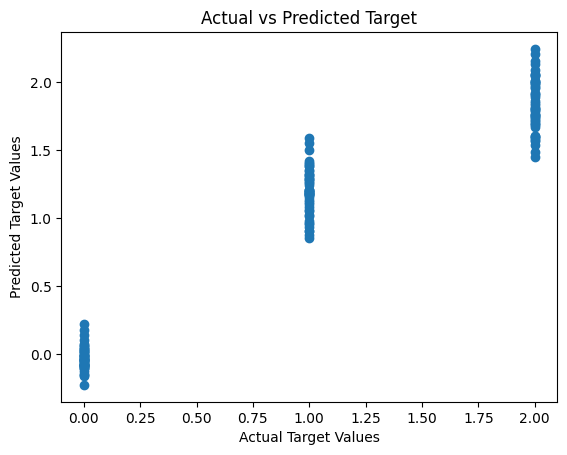

In [10]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted Target")
plt.show()

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [43]:
input_cols = [col for col in df.columns if col != 'target']
results = {}

for col in input_cols:
    x_single = df[[col]]
    y = df['target']

    model = sklearn.linear_model.LinearRegression()
    model.fit(x_single, y)

    y_pred = model.predict(x_single)
    mse = np.mean((y - y_pred) ** 2)
    results[col] = mse

sorted_results = sorted(results.items(), key=lambda x: x[1])
for col, mse in sorted_results:
    print(f"{col}: {mse}")

petal-width: 0.05678463583919234
petal-length: 0.06621216537347081
sepal-length: 0.2583986123119253
sepal-width: 0.5493765900582834


### Predictive Performance Eval
The best single-feature linear model uses petal-width, which gives an MSE of 0.0568. The full model that uses all four input columns produces a lower MSE of 0.0464. This is only a small improvement, because most of the predictive power in the dataset comes from petal-width (and petal-length). The sepal measurements add very little information, so including them only slightly reduces the overall error.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

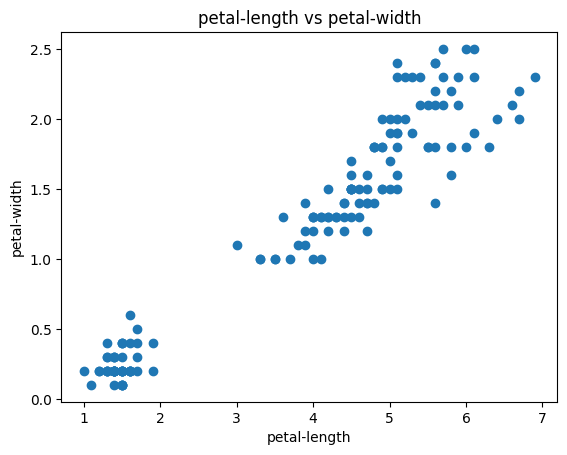

In [52]:
x = 'petal-length'
y = 'petal-width'

plt.figure()
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"{x} vs {y}")
plt.show()

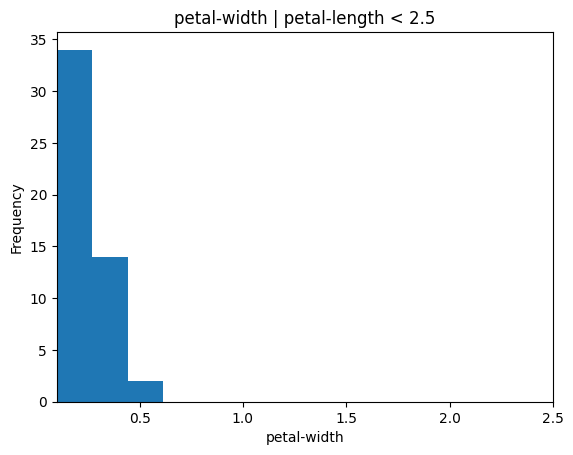

In [50]:
t = 2.5
low_thres = df[x] < t
high_thres = ~low_thres

y_min = df[y].min()
y_max = df[y].max()

plt.figure()
plt.hist(df.loc[low_thres, y], bins=np.linspace(y_min, y_max, 15))
plt.xlabel(y)
plt.ylabel("Frequency")
plt.title(f"{y} | {x} < {t}")
plt.xlim(y_min, y_max)
plt.show()

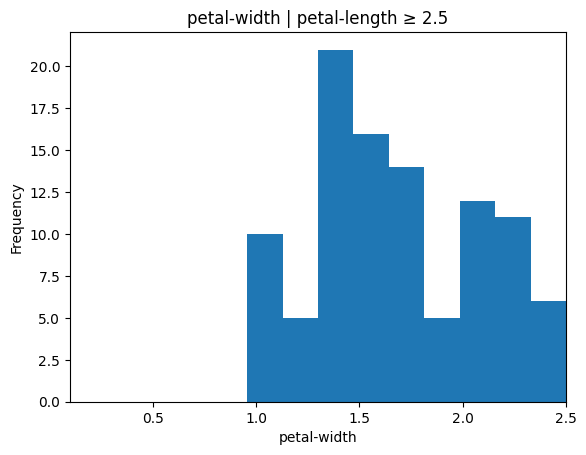

In [51]:
plt.figure()
plt.hist(df.loc[high_thres, y], bins=np.linspace(y_min, y_max, 15))
plt.xlabel(y)
plt.ylabel("Frequency")
plt.title(f"{y} | {x} ≥ {t}")
plt.xlim(y_min, y_max)
plt.show()

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [5]:
x = df.drop(columns=["target"]).values
y = df["target"].values

x_mean = x.mean(axis=0)
x_std = x.std(axis=0, ddof=0)
x_scaled = (x - x_mean) / x_std

pca = PCA()
pca.fit(x_scaled)

print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


In [6]:
n = x.shape[1]
half = n // 2

variance_fh = pca.explained_variance_ratio_[:half].sum()
print(variance_fh)

0.9580097536148198


In [12]:
z = pca.transform(x_scaled)
z_half = z[:, :half]

model = sklearn.linear_model.LinearRegression()
model.fit(z_half, y)

y_pred = model.predict(z_half)

mse_pca = np.mean((y - y_pred)**2)
print(mse_pca)

0.07146725091639042


In [13]:
print(mse_full)
print(mse_pca)

0.046385088311226945
0.07146725091639042


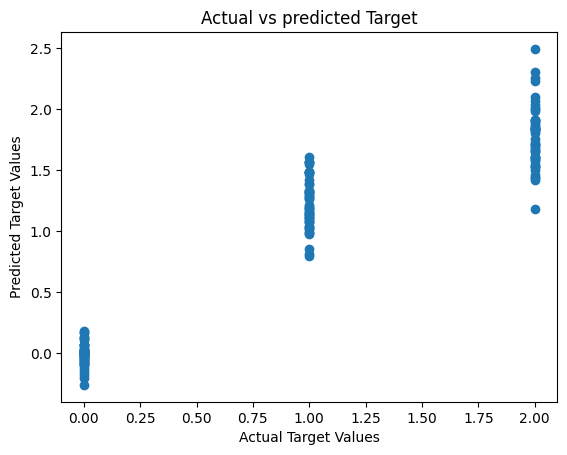

In [14]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs predicted Target")
plt.show()

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [16]:
corr = df.drop(columns=['target']).corr()
print(corr)

              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000


In [17]:
no_diag = corr.where(~np.eye(corr.shape[0],dtype=bool))

max_pair = no_diag.unstack().idxmax()
print(max_pair)

('petal-length', 'petal-width')


### How is that correlation reflected in the principal components?
The strongest correlation in the input columns is between petal-length and petal-width. This correlation is reflected in the principal components because both variables have large, same-sign loadings in the PC1. PC1 therefore captures their shared pattern of variation, which represents overall petal size. As a result, PC1 explains most of the total variance in the data. The remaining components only represent small differences between the two variables, since the main shared structure is already captured by PC1.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [ ]:
x = df.drop(columns=['target']).values

x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
x_scaled = (x - x_mean) / x_std

pca = PCA(n_components=2)
z = pca.fit_transform(x_scaled)

center = z.mean(axis=0)
distance = np.linalg.norm(z - center, axis=1)

outlier = np.argmax(distance)
print(outlier)
print(df.iloc[outlier])

118
sepal-length    5.7
sepal-width     4.4
petal-length    1.5
petal-width     0.4
target          0.0
Name: 118, dtype: float64


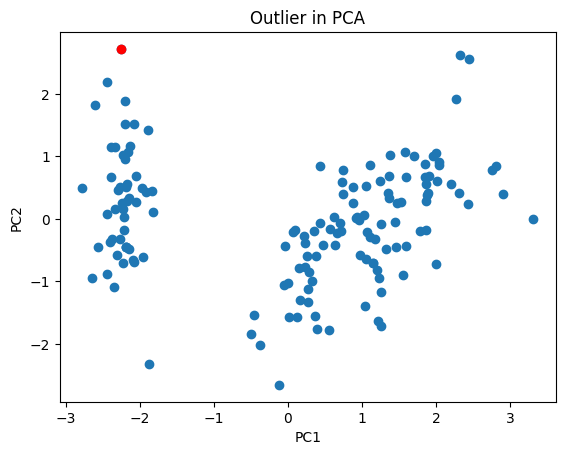

In [19]:
plt.figure()
plt.scatter(z[:,0], z[:,1])
plt.scatter(z[outlier, 0], z[outlier, 1], color='red')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Outlier in PCA")
plt.show()

### Explanation
I identified an outlier by measuring each observation’s distance from the center of the first two principal components. After standardizing the data and applying PCA, most points formed a tight cluster in the PC1–PC2 space, while one point appeared far away from the rest. Because PCA captures the main directions of variation in the dataset, a point that lies unusually far from the cluster in this space indicates that its combination of feature values does not follow the same pattern as the rest of the data. The visualization clearly shows this single point separated from the main group, which demonstrates why it is considered an outlier.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE